## NAME OF THE PROGRAM
### CS3030 Artificial Intelligence - Spring 2025
### NAME OF STUDENT

Install OPENCV: **pip install opencv-python**


Install SKLEARN : **pip install scikit-learn**

In [42]:


%pip install opencv-python
%pip install scikit-learn
%pip install matplotlib
%pip install numpy

# 
# IMPORT LIBRARIES SUCH AS CV2, NUMPY, SKLEARN, MATPLOTLIB
#

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt





Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Settings

In [ ]:
#
# DEFINE THE PATH FOR THE IMAGES, RESIZE IMAGES AND THE CATEGORIES
#

DATASET_PATH = "./Dataset"
CATS_PATH = os.path.join(DATASET_PATH, 'cats')
DOGS_PATH = os.path.join(DATASET_PATH, 'dogs')
CAR_PATH = os.path.join(DATASET_PATH, 'cars')
IMAGE_SIZE = (64, 64) 
CATEGORIES = ['cats', 'dogs', 'cars']




### Load Data

In [ ]:
#
#  X and y ARE THE INITIAL LISTS TO LOAD DATA
#

X = []
y = []

for label, category in enumerate(CATEGORIES):             # for every CATEGORY
    folder_path = os.path.join(DATASET_PATH, category)         # create the PATH for the folder
    for filename in os.listdir(folder_path):                         # for every file in the folder
        file_path = os.path.join(folder_path, filename)                     # create the PATH for every FILE
        image = cv2.imread(file_path)                                       # read the file, the IMAGE
        if image is None:
            continue  # Skip unreadable images
        image = cv2.resize(image, IMAGE_SIZE)                               # RESIZE THE IMAGE <- YOU CAN CUSTOMIZE IT
        image_flat = image.flatten()                                        # CONVERT THE MATRIX TO  1 ROW
        X.append(image_flat)                                                # list X <- the image in numbers
        y.append(label)                                                     # list y <- the label 0=CATS, 1=DOGS, 2=CARS

In [ ]:
#
# REMOVE THE TRAILER CHARACTERS IN X AND y TO HAVE CLEAN MATRIX
#
# every row of X is an IMAGE on flat format
# every row in y is the LABEL of the image [CAT or DOG]

X = np.array(X)
y = np.array(y)

print(X) # Cats and Dogs flatten
print(y) # 0=Cat, 1=Dog

[[  8   8   8 ...   9   9  22]
 [ 60 112 135 ... 159 144 197]
 [ 57  59  58 ...  20  25  25]
 ...
 [117 124 119 ... 173 176 182]
 [210 184 188 ...  52 100  97]
 [ 64  64  64 ...  65  65  65]]
[0 0 0 ... 2 2 2]


In [ ]:
#
# Check if the the number of rows are correct
#

print(X.shape)
print(y.shape)

#
# OBSERVER HOW MANY COLUMNS ARE IN X
#

(31129, 12288)
(31129,)


### Split Data

In [ ]:
#
# INPUT X and y
#
# OUTPUT X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

knn = KNeighborsClassifier(n_neighbors=75)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn.score(X_test, y_test)

0.5069065210407967

In [ ]:

#
# Verify the number of rows
#

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21790, 12288)
(9339, 12288)
(21790,)
(9339,)


In [ ]:
# print(X_test)

# Decisition Tree Classifier

In [ ]:


#
# Train the decision tree
#
# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the decision tree to the training data
clf.fit(X_train, y_train)



### Predict and Report

In [ ]:
#
#  clf is the MODEL
# 
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
#
# Verify the number of rows in y_pred
#

y_pred.shape

(9339,)

### Accuracy

In [ ]:
#
# If we know the y_test, how is the accuracy of model
#

accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

### Confusion Matrix

In [ ]:
#
# create matrix to compare real vs predicted values
matrix = confusion_matrix(y_test, y_pred)
print(matrix)


### Classificatin Report

In [ ]:
#
# Classification report shows: PRECISION, RECALL, F1-SCORE and ACCURACY
#

report = classification_report(y_test, y_pred)
print(report)

# TESTING using new data

### Load Data for testing

In [ ]:
#
# Xnew will store the nex flatten images
#

Xnew = []

DATASET_PATH_NEW = './catsdogscars_Testing'
IMAGE_SIZE = (64, 64)  # Resize images
CATEGORIES = ['cat', 'dog']

folder_path = DATASET_PATH_NEW

for filename in os.listdir(DATASET_PATH_NEW):
    file_path = os.path.join(folder_path, filename)
    image = cv2.imread(file_path)
    if image is None:
        continue  # Skip unreadable images
    image = cv2.resize(image, IMAGE_SIZE)
    image_flat = image.flatten()
    Xnew.append(image_flat)

In [ ]:

#
# REMOVE THE TRAILER CHARACTERS IN Xnew HAVE CLEAN MATRIX
#
# every row of Xnew is an IMAGE on flat format

Xnew = np.array(Xnew)
print(Xnew.shape)
print(Xnew)

#
# Observer there is not y LABEL of NEW TESTING images
#

(13, 12288)
[[255 255 255 ... 255 255 255]
 [212 215 222 ...  44  40  46]
 [ 87 178 145 ...   1   4   9]
 ...
 [ 54 126 133 ...  39  56  59]
 [ 29  90  70 ...  86  81  94]
 [254 246 209 ...  47  88  67]]


### Predict

In [ ]:
#
#  clf is the MODEL
# 

y_pred_new = knn.predict(Xnew)
print(y_pred_new)


[2 0 0 0 0 1 0 0 0 0 1 1 1]


### Print the output after predictions

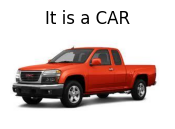

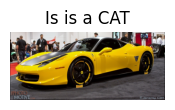

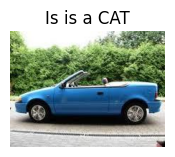

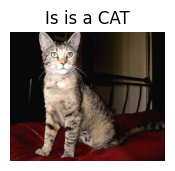

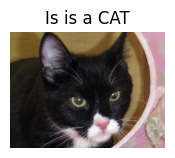

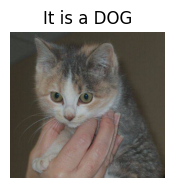

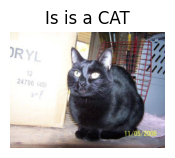

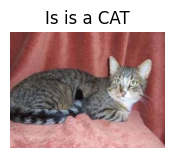

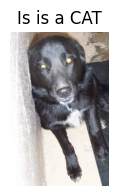

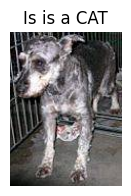

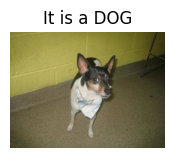

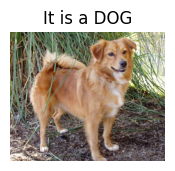

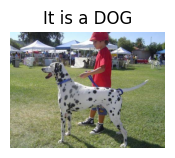

In [ ]:
#
# y_pred_new CONTAINS ONLY 0,s AND 1,s SUCH AS [0 0 0 1 1 1]
#
# IF 0 then it is predicted CAT
# IF 1 then it is predicted DOG

y_pred_new
i = 0
for filename in os.listdir(DATASET_PATH_NEW):
    file_path = os.path.join(folder_path, filename)
    image = cv2.imread(file_path)
    # OpenCV uses BGR as its default colour order for images, matplotlib uses RGB.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(2, 2))  # width, height in inches
    plt.imshow(image)
    if y_pred_new[i] == 0:
        plt.title('Is is a CAT')
    elif y_pred_new[i] == 1:
        plt.title('It is a DOG')
    else: 
        plt.title('It is a CAR')
    i=i+1
    plt.axis('off')  # optional: hides axis ticks
    plt.show()

#
# We read the images only for demonstration
#